#I. Data import and discovery

### Installing the packages we used

In [ ]:
pip install requests

In [ ]:
pip install lxml

In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
pip install geopandas

* requests is a package used to retrieve data from a website
* lxml is a package for downloading lxml files
* selenium is a package for automated interaction with a server

## Importing the libraries we've used

In [ ]:
import lxml
import selenium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import bs4
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme()


## Importing data from an API

** Data retrieval from an online API: "ergast.com".
* For ease of reading, we've imported the data into another notebook and saved it as a csv. Here we import the data directly from the csv.

### Base "races"

*Objective: creation of a "Races" database containing the years of the seasons, the name and rank of the circuit in the season, the latitude and longitude of the circuit (useful later for geographical representations), the country and date of the circuit, and the associated wikipedia url.
* The database contains 550 lines corresponding to seasons between 1990 and 2023.

In [ ]:
races=pd.read_csv('race.csv', index_col=0)

In [ ]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1991,1,phoenix,33.4479,-112.07500,USA,1991-03-10,http://en.wikipedia.org/wiki/1991_United_State...
1,1991,2,interlagos,-23.7036,-46.69970,Brazil,1991-03-24,http://en.wikipedia.org/wiki/1991_Brazilian_Gr...
2,1991,3,imola,44.3439,11.71670,Italy,1991-04-28,http://en.wikipedia.org/wiki/1991_San_Marino_G...
3,1991,4,monaco,43.7347,7.42056,Monaco,1991-05-12,http://en.wikipedia.org/wiki/1991_Monaco_Grand...
4,1991,5,villeneuve,45.5000,-73.52280,Canada,1991-06-02,http://en.wikipedia.org/wiki/1991_Canadian_Gra...


In [ ]:
races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      557 non-null    int64  
 1   round       557 non-null    int64  
 2   circuit_id  557 non-null    object 
 3   lat         557 non-null    float64
 4   long        557 non-null    float64
 5   country     557 non-null    object 
 6   date        557 non-null    object 
 7   url         557 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 39.2+ KB


## Database "Results"

Objective: creation of a second database including starting grid position and final podium.
* Observations of missing values on the "time" variable: we therefore chose to exclude it (64% missing values).

In [ ]:
results=pd.read_csv('results.csv', index_col=0)

In [ ]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1991,1,phoenix,senna,1960-03-21,Brazilian,mclaren,1,7247828.0,Finished,10.0,1
1,1991,1,phoenix,prost,1955-02-24,French,ferrari,2,7264150.0,Finished,6.0,2
2,1991,1,phoenix,piquet,1952-08-17,Brazilian,benetton,5,7325204.0,Finished,4.0,3
3,1991,1,phoenix,modena,1963-05-12,Italian,tyrrell,11,7333237.0,Finished,3.0,4
4,1991,1,phoenix,satoru_nakajima,1953-02-23,Japanese,tyrrell,16,NaN,+1 Lap,2.0,5


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12357 entries, 0 to 12356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         12357 non-null  int64  
 1   round          12357 non-null  int64  
 2   circuit_id     12357 non-null  object 
 3   driver         12357 non-null  object 
 4   date_of_birth  12357 non-null  object 
 5   nationality    12357 non-null  object 
 6   constructor    12357 non-null  object 
 7   grid           12357 non-null  int64  
 8   time           4593 non-null   float64
 9   status         12357 non-null  object 
 10  points         12349 non-null  float64
 11  podium         12357 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


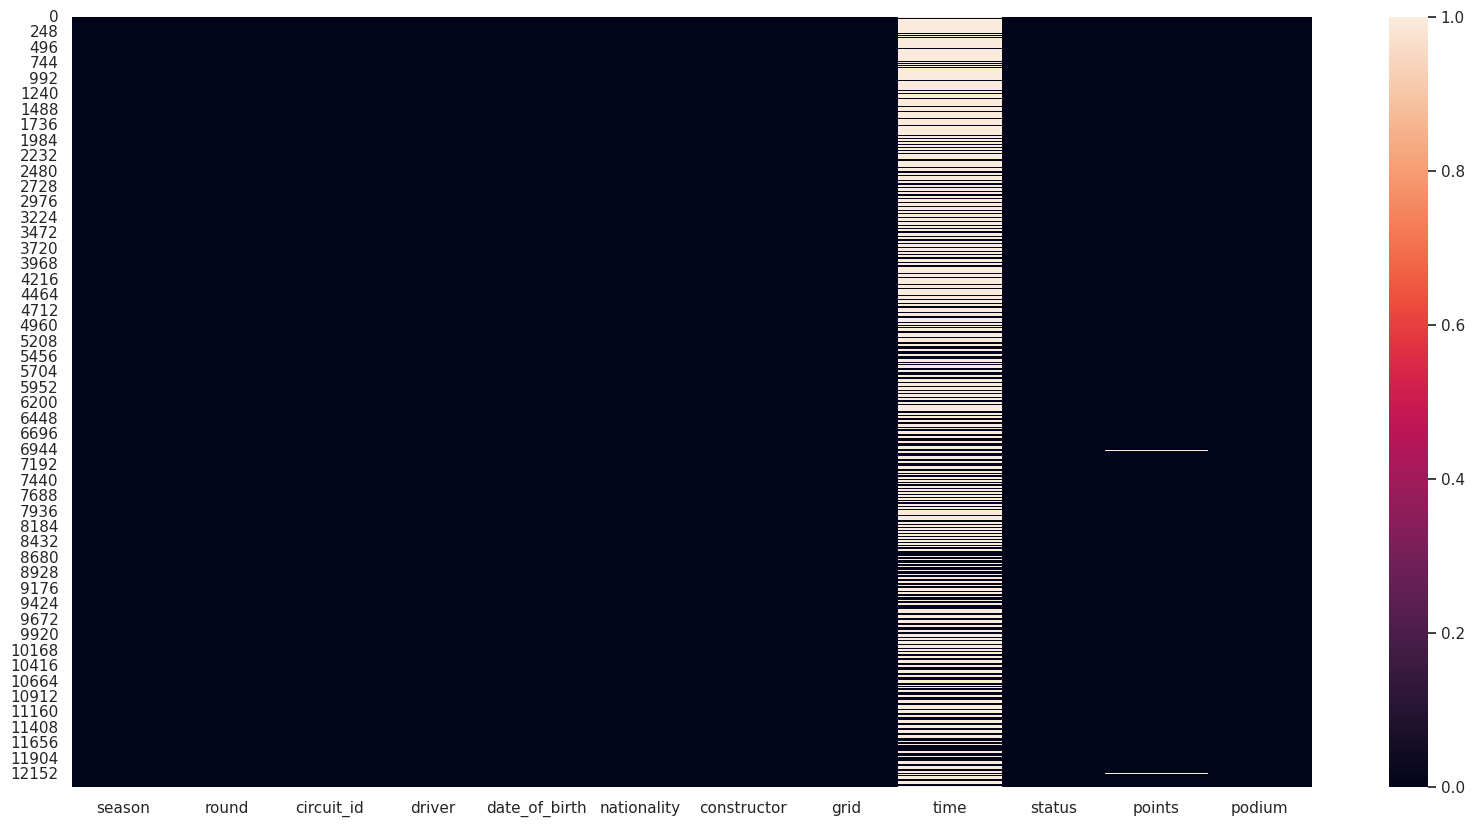

In [ ]:
results_na=results.copy()
sns.heatmap(results_na.isna())
results_na.isna()['time'].mean()

results=results.drop(labels='time', axis=1)

###  DataBase "driver_standings"

* Objective: create a database containing drivers' win and points histories for the season

In [ ]:
driver_standings=pd.read_csv('driver_standings.csv', index_col=0)

In [ ]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12704 entries, 0 to 12703
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                12704 non-null  int64  
 1   round                 12704 non-null  int64  
 2   driver                12704 non-null  object 
 3   driver_points         12704 non-null  float64
 4   driver_wins           12704 non-null  float64
 5   driver_standings_pos  12704 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 694.8+ KB


In [ ]:
driver_standings.head()

,season,round,driver,driver_points,driver_wins,driver_standings_pos
0,1991,1,senna,0.0,0.0,0.0
1,1991,1,prost,0.0,0.0,0.0
2,1991,1,piquet,0.0,0.0,0.0
3,1991,1,modena,0.0,0.0,0.0
4,1991,1,satoru_nakajima,0.0,0.0,0.0


#### Creation of the "constructor_standings" database

* Objective: to create a database containing the history of victories and points over the season for manufacturers

In [ ]:
constructor_standings=pd.read_csv('constructor_standings.csv', index_col=0)

In [ ]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6227
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     6228 non-null   int64  
 1   round                      6228 non-null   int64  
 2   constructor                6228 non-null   object 
 3   constructor_points         6228 non-null   float64
 4   constructor_wins           6228 non-null   float64
 5   constructor_standings_pos  6228 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 340.6+ KB


In [ ]:
constructor_standings.head()

,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1991,1,mclaren,0.0,0.0,0.0
1,1991,1,ferrari,0.0,0.0,0.0
2,1991,1,tyrrell,0.0,0.0,0.0
3,1991,1,benetton,0.0,0.0,0.0
4,1991,1,larrousse,0.0,0.0,0.0


### Creation of the "qualifying_results" database

** Objective: to create a database containing information on qualifiers, such as time and position.

In [ ]:
qualifying_results=pd.read_csv('qualifying_results.csv', index_col=0)

In [ ]:
qualifying_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   grid             12074 non-null  int64 
 1   driver_name      12074 non-null  object
 2   car              12074 non-null  object
 3   qualifying_time  11804 non-null  object
 4   season           12074 non-null  int64 
 5   round            12074 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 660.3+ KB


In [ ]:
qualifying_results.head()

,grid,driver_name,car,qualifying_time,season,round
0,1,Gerhard Berger BER,McLaren Honda,1:28.664,1990,1
1,2,Pierluigi Martini MAR,Minardi Ford,1:28.731,1990,1
2,3,Andrea de Cesaris DEC,Dallara Ford,1:29.019,1990,1
3,4,Jean Alesi ALE,Tyrrell Ford,1:29.408,1990,1
4,5,Ayrton Senna SEN,McLaren Honda,1:29.431,1990,1


###  Database "weather"

Objective: create a second database including weather conditions for each race

In [ ]:
weather=pd.read_csv('weather.csv', index_col=0)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          557 non-null    int64 
 1   round           557 non-null    int64 
 2   circuit_id      557 non-null    object
 3   weather         557 non-null    object
 4   weather_warm    557 non-null    int64 
 5   weather_cold    557 non-null    int64 
 6   weather_dry     557 non-null    int64 
 7   weather_wet     557 non-null    int64 
 8   weather_cloudy  557 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.5+ KB


In [ ]:
weather.head()

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1991,1,phoenix,Overcast 25 °C (77 °F)[1],0,0,0,0,1
1,1991,2,interlagos,"Cloudy at start, rainy later. Ambient temperat...",0,0,0,1,1
2,1991,3,imola,"Wet at start, dry by finish",0,0,1,1,0
3,1991,4,monaco,"Cloudy, mild, dry",0,0,1,0,0
4,1991,5,villeneuve,Mild with temperatures approaching 25 °C (77 °...,1,0,0,0,0


#II- Descriptive statistics and study of the link between our variables and victory

In this section, we'll be looking at the link between the variables available to us and our target, i.e. final victory. The idea is to estimate whether the "intuitive" explanatory variables, such as the starting grid, the manufacturer or the weather, hold any signal for predicting victory.

### II-1. Correlation between Start Grid and Finish Ranking

* La première idée est d'étudier le lien entre la grille de départ et le classement final. En effet, cela nous paraît le premier critère qui va determiner l'issue de la course

## First correlation study

* We plot the point cloud for all the data available to us

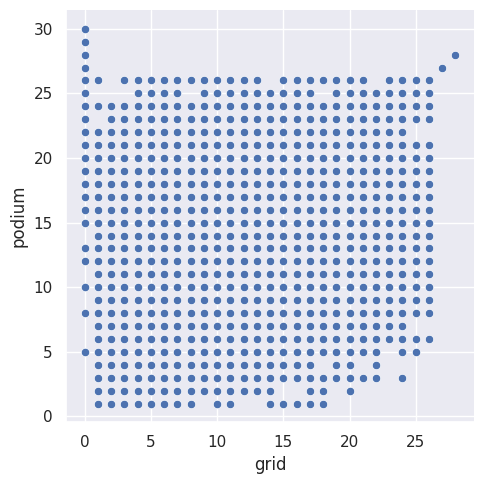

In [ ]:
sns.relplot(x="grid", y="podium", data=results)

* Comments: At first glance, there are no clear correlations between initial grid position and finish position. This is probably due to the sheer volume of data and the totally different years we're studying: there's a lot of noise.

* We then plot this point cloud for the year 2020, to give a better visualization of the points, and by circuit, to visualize trends by circuit.

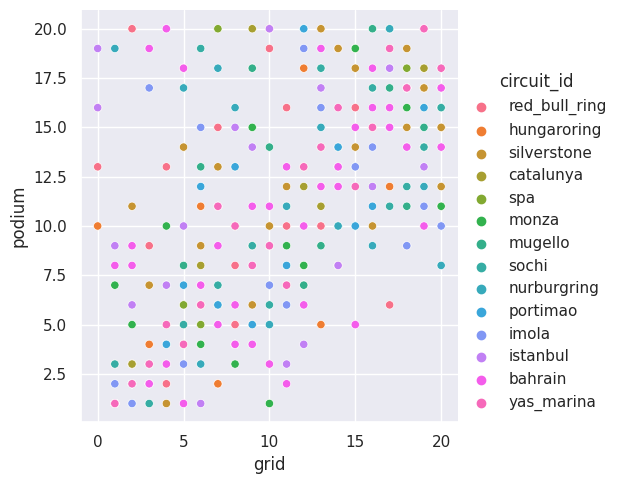

In [ ]:
results_2020=results.copy()
results_2020=results_2020[results_2020["season"]>=2020]
sns.relplot(x="grid", y="podium", data=results_2020[results_2020["season"]==2020],hue="circuit_id")

* Comments: No clear correlation yet, but a linear trend is emerging.

### Creation of a correlation function between the grid and the podium

In [ ]:
results_2010=results[results["season"]>=2010].copy()

* This function gives the correlation between the podium and the grid for each circuit in the chosen year.

In [ ]:

def corr_grid_podium(annee):

    circuits=results_2010[results_2010["season"] ==annee]["circuit_id"].unique()
    df=results_2010[results_2010["season"] ==annee]
    les_correlations={}

    for circuit in circuits:
        df1=df[df["circuit_id"]==circuit][['grid',"podium"]]
        corr=df1.corr()["podium"][0]
        les_correlations[circuit]=corr

    df2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
    df2=df2.sort_values(by='correlation_grid_pod',ascending=False)

    print(df2)

    _,(ax1) = plt.subplots(ncols=1)
    sns.barplot(data=df2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))


        circuit_id  correlation_grid_pod
7           ricard              0.851128
5           monaco              0.846617
14      marina_bay              0.840602
11     hungaroring              0.803008
4        catalunya              0.775940
17       rodriguez              0.762406
0      albert_park              0.718797
2         shanghai              0.711278
9      silverstone              0.684211
20      yas_marina              0.664662
1          bahrain              0.622556
18        americas              0.590977
6       villeneuve              0.575940
8    red_bull_ring              0.544361
15           sochi              0.535338
16          suzuka              0.503759
3             baku              0.354306
13           monza              0.324812
12             spa              0.231579
19      interlagos              0.129323
10  hockenheimring             -0.073684
None


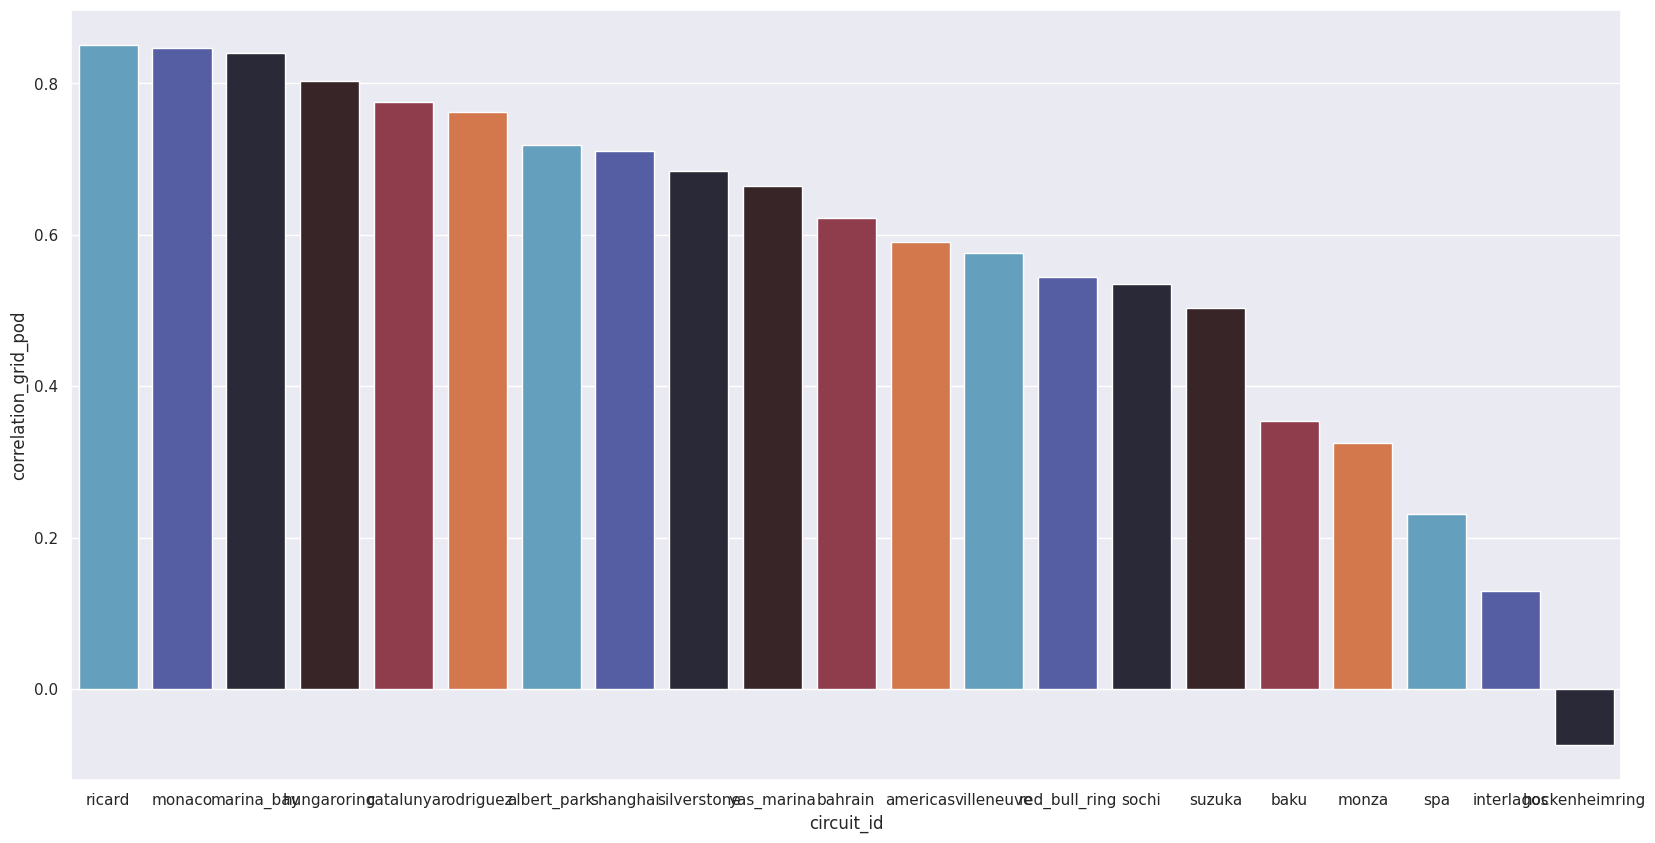

In [ ]:
print(corr_grid_podium(2019)) # We chose 2019

* Observations: A correlation close to 0.84 (close to 1) is observed for the Monaco circuit, which is consistent with the fact that the streets are very narrow for overtaking. In contrast, it's very easy to manoeuvre on the SPa circuit, hence a much lower correlation.

# II-2. Correlation between manufacturer and grid and finish rankings

* Our second idea is to study the importance of the builder in the final victory.

## Average position of manufacturers on the grid and at the finish

In [ ]:
results_constructeur=results.copy()
results_constructeur=results_constructeur[["constructor","podium","grid"]]

In [ ]:
results_constructeur.groupby("constructor").mean().sort_values(by="podium",ascending=True)

,podium,grid
constructor,,
brawn,4.882353,5.117647
mercedes,5.736287,4.586498
ferrari,7.388689,5.806104
red_bull,7.851227,6.754601
bmw_sauber,8.921429,8.935714
mclaren,9.269300,7.553860
benetton,9.652778,8.522222
alpine,10.250000,10.590909
renault,10.467626,9.989209


* Observations: As expected, Mercedes, Ferrari and RedBull have the best average starting positions and finishing positions.

## Percentage of races won by manufacturer since 1990

<Axes: xlabel='constructor', ylabel='podium'>

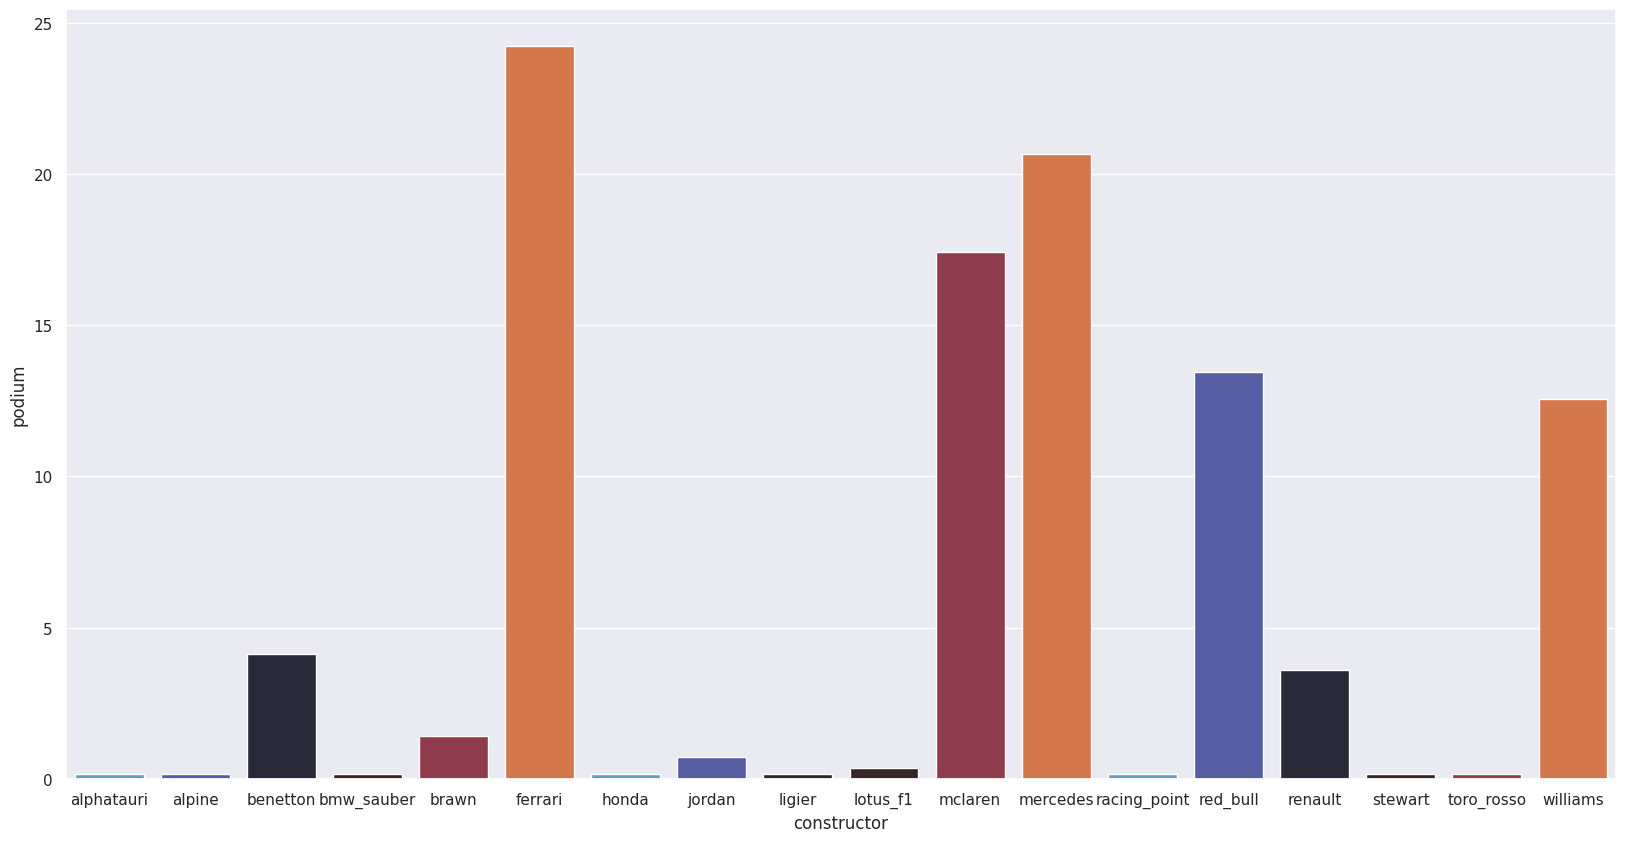

In [ ]:
results_constructeur_1=results_constructeur.copy()
results_constructeur_1=results_constructeur_1[results_constructeur_1["podium"]==1]
df=(results_constructeur_1.groupby("constructor").count())/len(results_constructeur_1)*100
df=df.reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df, x='constructor', y='podium', ax=ax1, palette=sns.color_palette("icefire"))

* Observations: here again, without much surprise, some manufacturers stand out from the crowd, such as Ferrari, McLaren and Mercedes. There's a huge disparity between the manufacturers, so each one contains a signal that can be used to predict the final victory.

# II-3. Correlation between driver nationality and final victory

* We then turn to the link between nationality and victory. We're going to find
out whether this variable can explain or predict final victory. We'll simply
plot the percentage of victories by nationality.

In [ ]:
results_nationality=results.copy()
results_nationality=results_nationality[["nationality","grid","podium","circuit_id"]]

<Axes: xlabel='nationality', ylabel='podium'>

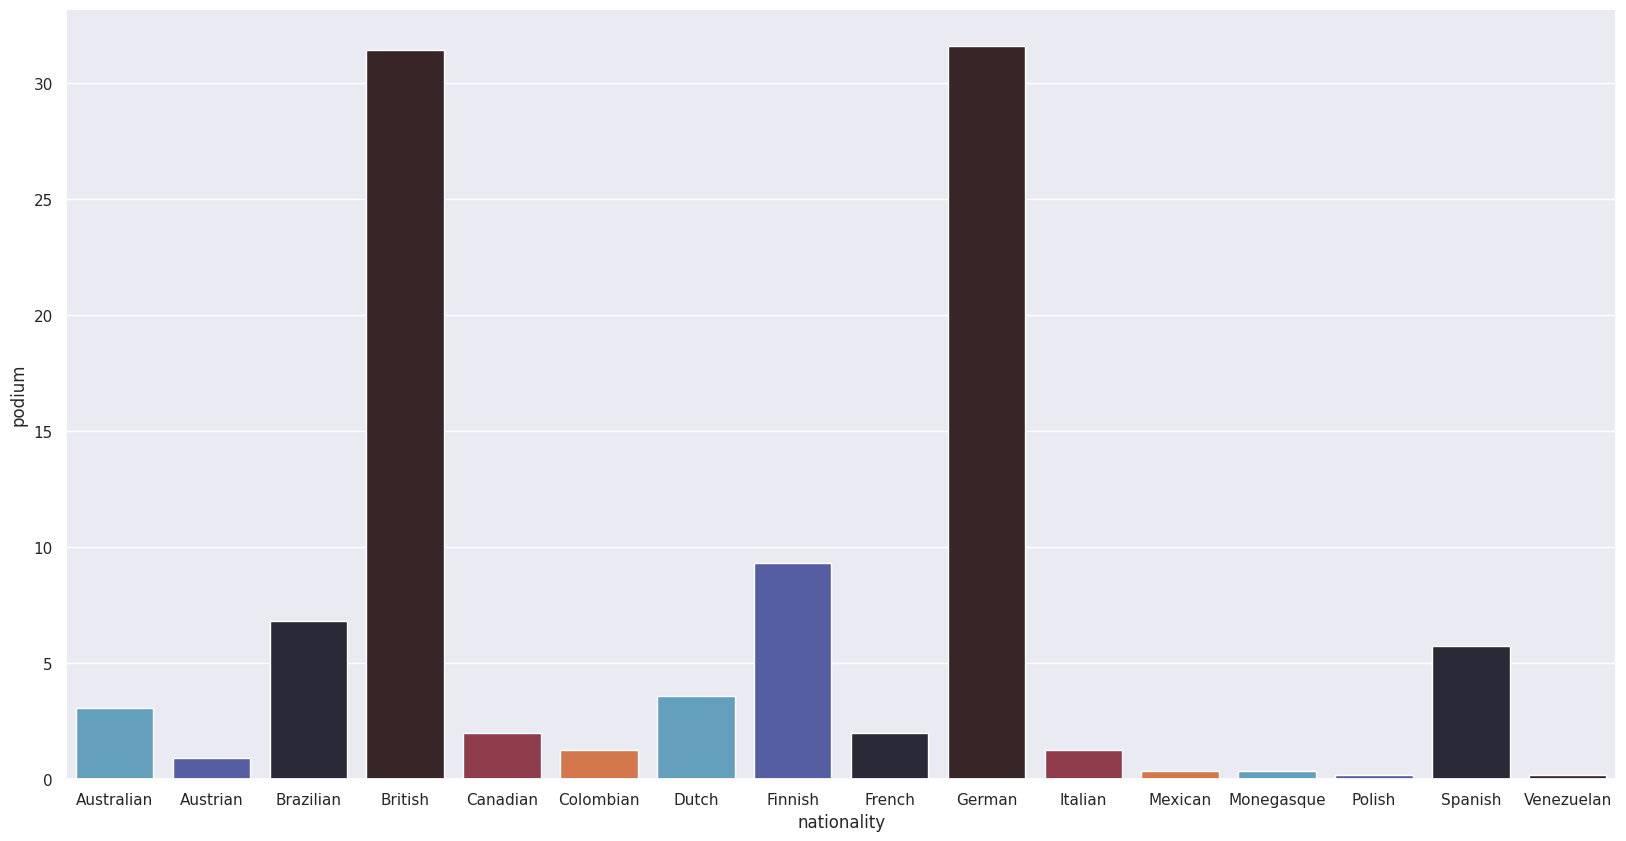

In [ ]:
nb_courses=len(results_nationality[results_nationality["podium"]==1])
df=((results_nationality[results_nationality["podium"]==1].groupby("nationality").count())/(nb_courses))*100
df=df.reset_index()
sns.barplot(x='nationality',y='podium',data=df,palette=sns.color_palette("icefire"))

* Comments: Unsurprisingly, the drivers with the most Grand Prix titles are German (Vettel, Schumacher, Rosberg), English (Hamilton), Brazilian (Senna) and Finnish (Räikkönen). There is a disparity between nationalities, which means that nationality is an important factor.

In [ ]:
# Add nationality
df_country_race=races[["circuit_id","country"]].copy()
df_country_race.head()
results_merged=results.merge(df_country_race ,how='left', on="circuit_id")

In [ ]:
print(results_merged)
print(results_merged["nationality"].unique())
print(results_merged["country"].unique())

        season  round  circuit_id           driver date_of_birth nationality  \
0         1991      1     phoenix            senna    1960-03-21   Brazilian   
1         1991      1     phoenix            prost    1955-02-24      French   
2         1991      1     phoenix           piquet    1952-08-17   Brazilian   
3         1991      1     phoenix           modena    1963-05-12     Italian   
4         1991      1     phoenix  satoru_nakajima    1953-02-23    Japanese   
...        ...    ...         ...              ...           ...         ...   
270541    2021     22  yas_marina          mazepin    1999-03-02     Russian   
270542    2021     22  yas_marina          mazepin    1999-03-02     Russian   
270543    2021     22  yas_marina          mazepin    1999-03-02     Russian   
270544    2021     22  yas_marina          mazepin    1999-03-02     Russian   
270545    2021     22  yas_marina          mazepin    1999-03-02     Russian   

       constructor  grid    status  poi

## II-4. Correlation between age and grand prix wins

* We now turn to the link between age and ultimate victory.

* To do this, we create the variable age in years below, which corresponds to the age at the time of the grand prix.

In [ ]:
results_age=results.copy()

results_age["date_of_birth"]=pd.to_datetime(results_age["date_of_birth"])

results_age["season"]=pd.to_datetime(results_age["season"], format="%Y") # conversion - format date

results_age["age"]=round(((results_age["season"]-results_age['date_of_birth']).dt.days)/365)

* Visualize created data

In [ ]:
results_age["date_of_birth"]

0       1960-03-21
1       1955-02-24
2       1952-08-17
3       1963-05-12
4       1953-02-23
           ...    
12352   1995-06-29
12353   1993-12-14
12354   1998-02-15
12355   1979-10-17
12356   1999-03-02
Name: date_of_birth, Length: 12357, dtype: datetime64[ns]

In [ ]:
results_age["season"]

0       1991-01-01
1       1991-01-01
2       1991-01-01
3       1991-01-01
4       1991-01-01
           ...    
12352   2021-01-01
12353   2021-01-01
12354   2021-01-01
12355   2021-01-01
12356   2021-01-01
Name: season, Length: 12357, dtype: datetime64[ns]

In [ ]:
results_age["age"]

0        31.0
1        36.0
2        38.0
3        28.0
4        38.0
         ... 
12352    26.0
12353    27.0
12354    23.0
12355    41.0
12356    22.0
Name: age, Length: 12357, dtype: float64

### Correlation between the podium and the age of the drivers at the time of the race


<Axes: >

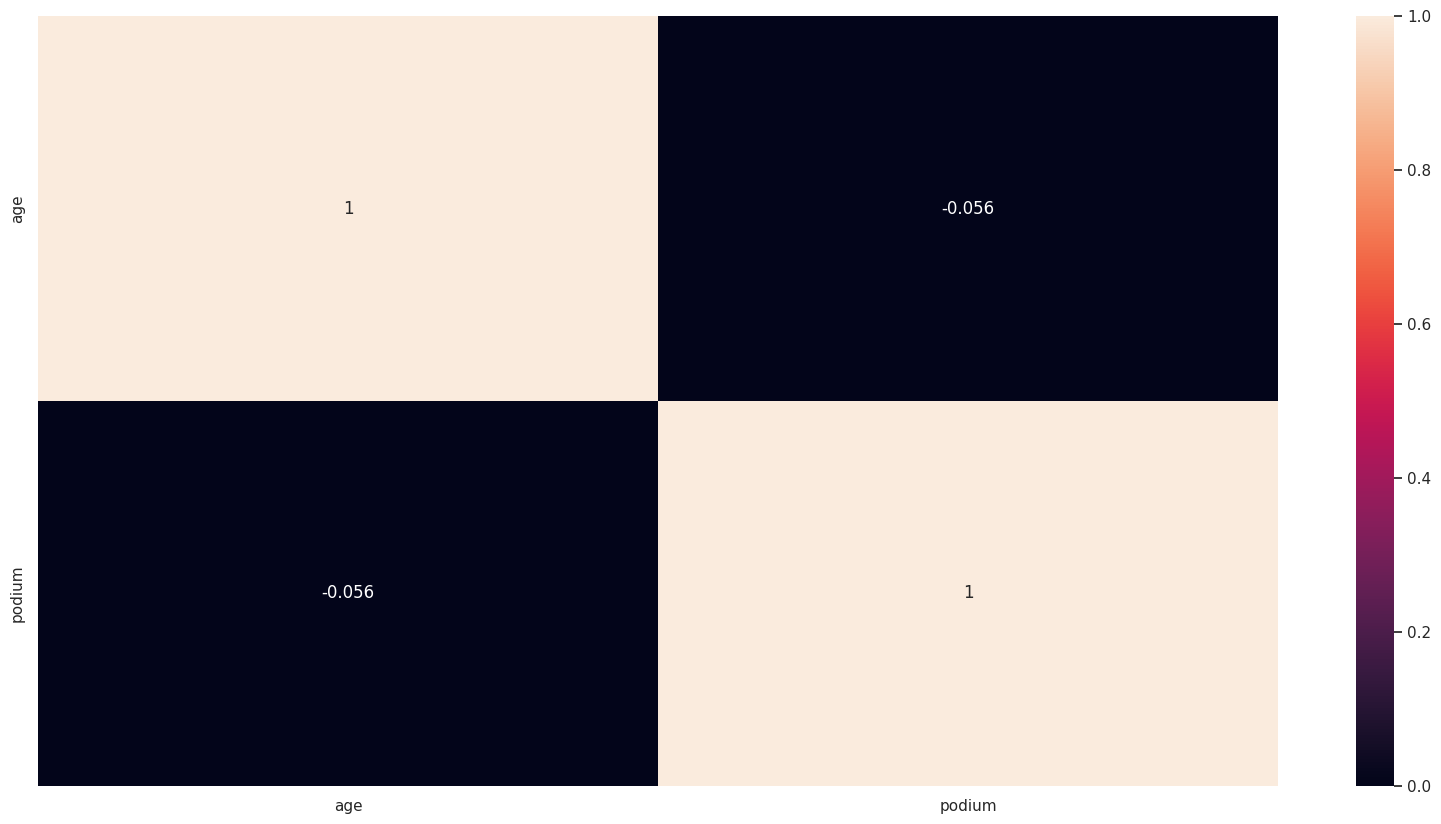

In [ ]:
df=results_age[["age","podium"]]

corr = df.corr()
sns.heatmap(corr,annot=True,vmin=0, vmax=1)

* Comments: There's a slight negative correlation between age and ranking: in other words, the older you are, the lower your ranking and the closer you are to victory.

### Victories by age group

* The number of victories per age is plotted, along with an approximation of the density.

<Axes: xlabel='age', ylabel='Count'>

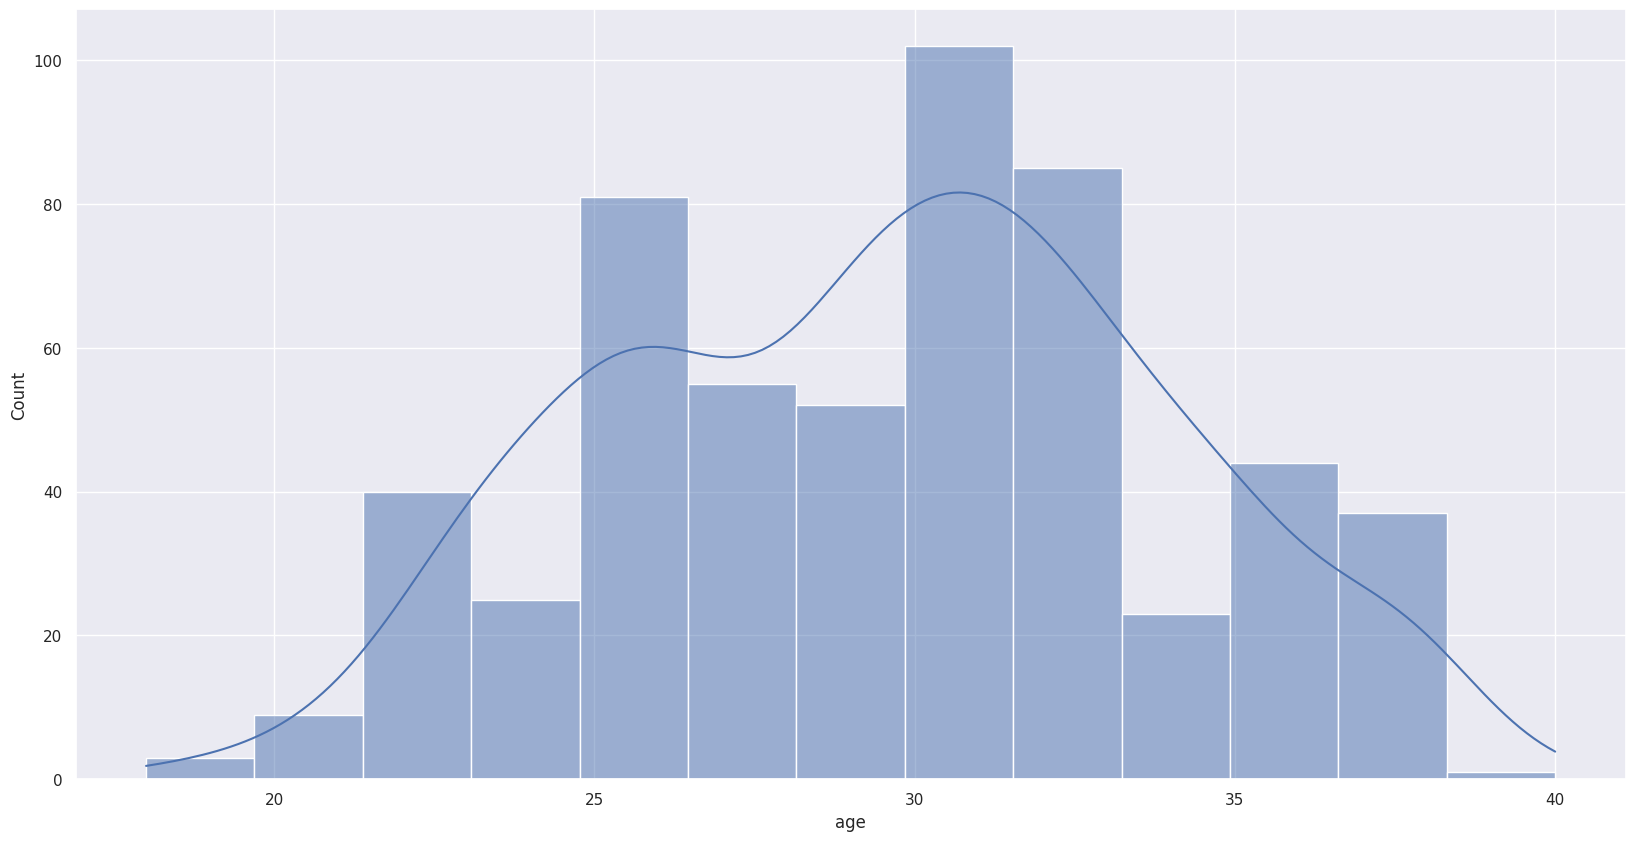

In [ ]:
df_gagnant=df[df["podium"]==1]
sns.histplot(data=df_gagnant, x='age',kde=True)

* Comments: There's a peak at 30 years of age, which corresponds to the right ratio between age and experience. Once again, we see a disparity in the distribution, which means that age contains information that can be used to predict victory.

## II-6. Weather analysis

In [ ]:
weather_merged=pd.merge(results, weather, how="right", left_on="circuit_id", right_on="circuit_id")

In [ ]:
weather_merged["weather"].nunique()

370

* There are 363 different types of tense, so we're going to look at the most common ones.

First, we look at dry circuits

        circuit_id  correlation_grid_pod
12         bahrain              0.914783
4   hockenheimring              0.903478
2       villeneuve              0.852174
13        shanghai              0.785217
0       interlagos              0.771304
8        catalunya              0.762609
17      yas_marina              0.746957
7            monza              0.701739
16      marina_bay              0.621739
10     albert_park              0.579130
3      silverstone              0.551304
1           monaco              0.532174
15        valencia              0.528696
5      hungaroring              0.487826
9           suzuka              0.485217
11          sepang              0.346957
6              spa              0.273913
14        istanbul                   NaN
18         yeongam                   NaN


<Axes: xlabel='circuit_id', ylabel='correlation_grid_pod'>

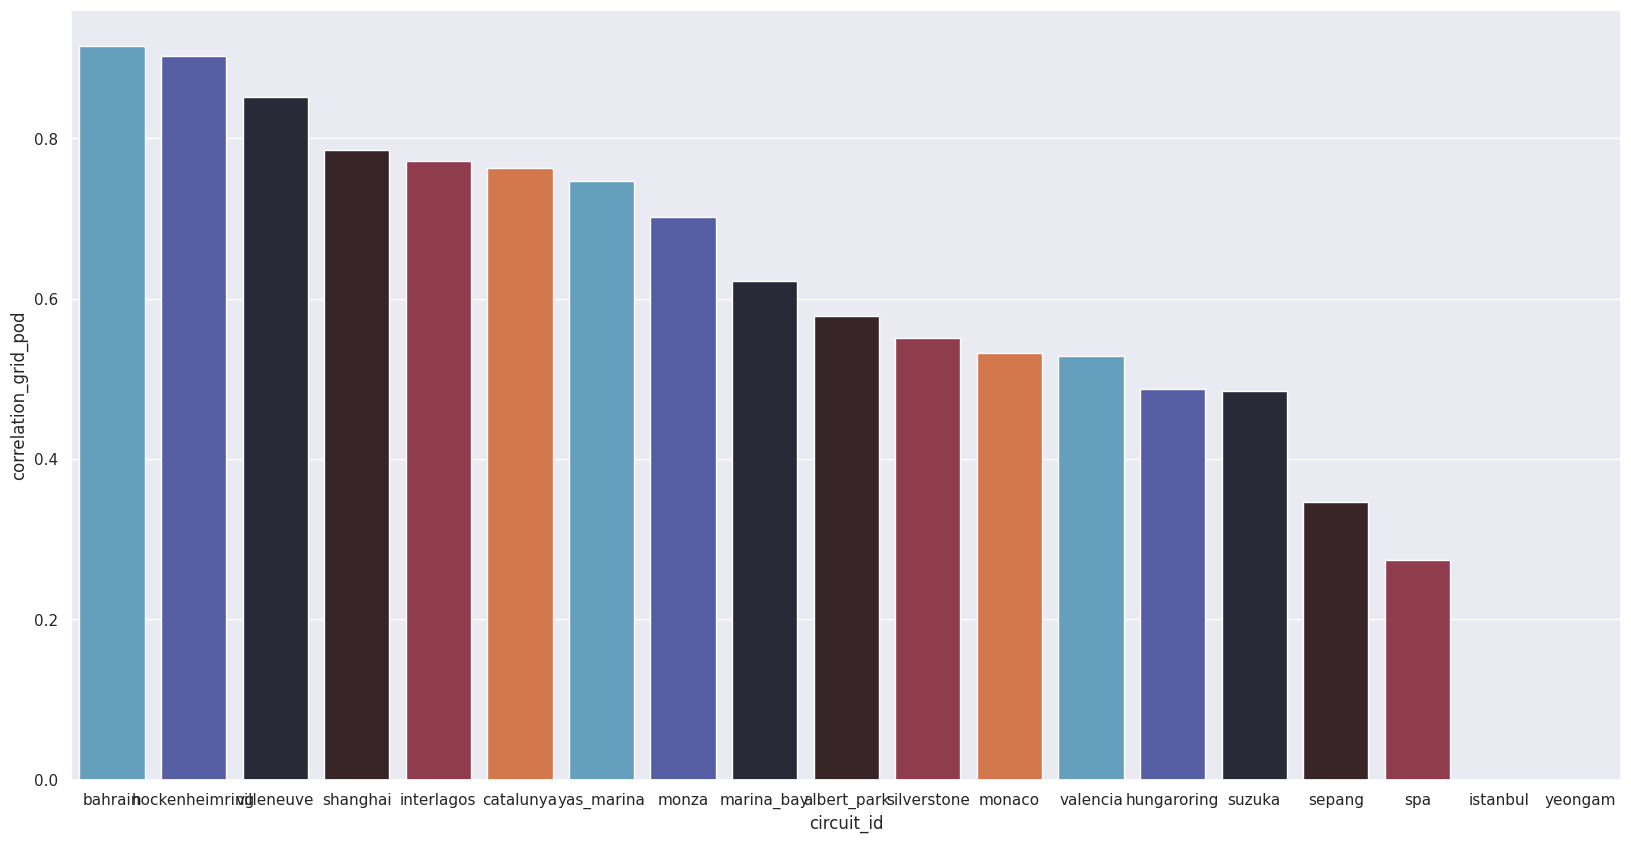

In [ ]:
results_2010=weather_merged.copy()
results_2010=results_2010[results_2010["season_x"]>=2010]
circuits=results_2010[results_2010["season_x"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season_x"] ==2010]
df_dry=df[df["weather_dry"]==1]
les_correlations={}

for circuit in circuits:
    df_dry_1=df_dry[df_dry["circuit_id"]==circuit][['grid',"podium"]]
    corr=df_dry_1.corr()["podium"][0]
    les_correlations[circuit]=corr

df_dry_2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df_dry_2=df_dry_2.sort_values(by='correlation_grid_pod',ascending=False)

print(df_dry_2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df_dry_2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))

* Comments: On circuits such as Bahrain and the Hockenheimring, there's a strong correlation between grid position and final podium finish. On these dry circuits, a good grid position virtually guarantees a final podium finish, and this correlation is stronger than when climate is not taken into account.

Next, we look at wet circuits

        circuit_id  correlation_grid_pod
4   hockenheimring              0.903478
2       villeneuve              0.852174
13        shanghai              0.785217
0       interlagos              0.771304
8        catalunya              0.762609
14        istanbul              0.758261
7            monza              0.701739
16      marina_bay              0.621739
10     albert_park              0.579130
3      silverstone              0.551304
1           monaco              0.532174
5      hungaroring              0.487826
9           suzuka              0.485217
11          sepang              0.346957
18         yeongam              0.312174
6              spa              0.273913
12         bahrain                   NaN
15        valencia                   NaN
17      yas_marina                   NaN


<Axes: xlabel='circuit_id', ylabel='correlation_grid_pod'>

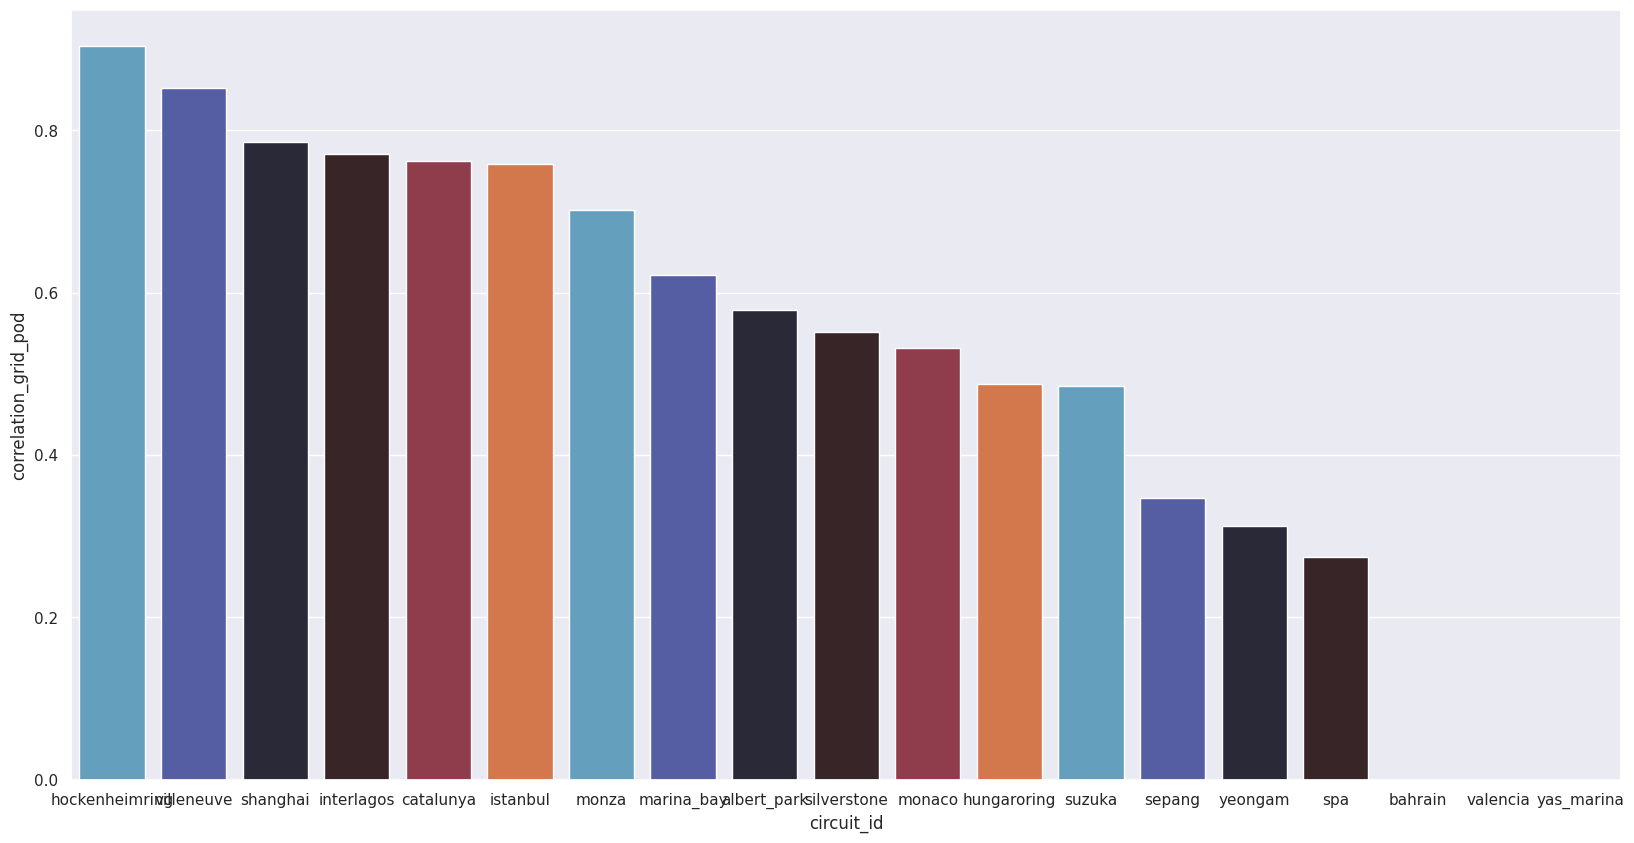

In [ ]:
circuits=results_2010[results_2010["season_x"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season_x"] ==2010]
df_wet=df[df["weather_wet"]==1]
les_correlations={}

for circuit in circuits:
    df_wet_1=df_wet[df_wet["circuit_id"]==circuit][['grid',"podium"]]
    corr=df_wet_1.corr()["podium"][0]
    les_correlations[circuit]=corr

df_wet_2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df_wet_2=df_wet_2.sort_values(by='correlation_grid_pod',ascending=False)

print(df_wet_2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df_wet_2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))

* Comments: Once again, there's a strong correlation between grid position and final podium finish at the Hockenheimring, meaning that a good grid position virtually guarantees a final podium finish, with this correlation being stronger than when climate is not taken into account. This reinforces the idea that the Hockenheimring circuit leaves little room for suspense.

## II-7. Viewing the various circuits on the board

In [ ]:
cities=pd.DataFrame({'circuit_id':races['circuit_id'],
                    'lat':races['lat'],
                    'long':races['long']})

<ipython-input-55-4df717ba73f8>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


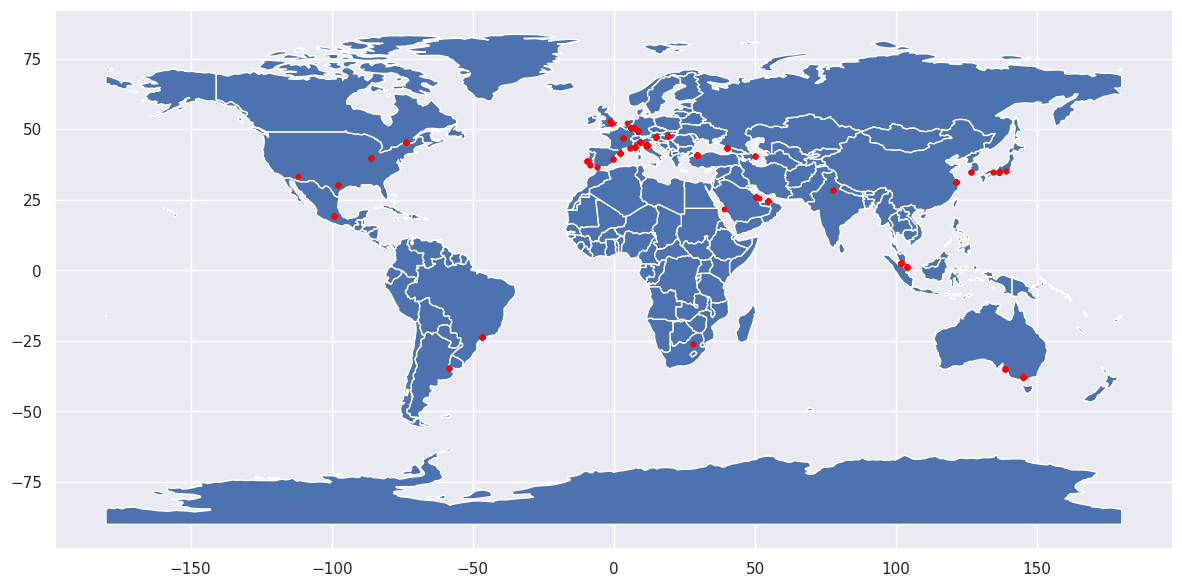

In [ ]:
geometry = [Point(xy) for xy in zip(races['long'], races['lat'])]
gdf = GeoDataFrame(races, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 7)), marker='o', color='red', markersize=10);

# III- Modeling

## III-1. Preparing data for modeling

The idea is to create a single dataframe in which we can find all the variables a priori useful for modeling, as well as our target, i.e. the race winner (or a proxy: the race ranking). To do this, we'll need to merge the dataframes, manage missing values and prepare the categorical variables.

### Preparing the dataframe merge

In [ ]:
qualifying_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   grid             12074 non-null  int64 
 1   driver_name      12074 non-null  object
 2   car              12074 non-null  object
 3   qualifying_time  11804 non-null  object
 4   season           12074 non-null  int64 
 5   round            12074 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 660.3+ KB


In [ ]:
qualifying_results["driver_name"]=qualifying_results["driver_name"].str.split()
index=qualifying_results.columns.get_loc("driver_name")
taille=len(qualifying_results)

for i in range(taille):

    qualifying_results.iloc[i,index]=qualifying_results.iloc[i,index][1]

qualifying_results.rename(columns={'driver_name': 'driver'}, inplace=True)
qualifying_results["driver"]=qualifying_results["driver"].str.lower()

### Merge dataframes

We're going to merge the dataframes from the results dataframe, which we believe is the most complete. We will then merge the dataframes one after the other on unique and common keys using the "left" method.

In [ ]:
results_2=results.merge(how="left",on=["season","round","constructor"],right=constructor_standings)
results_2.head()
results_3=results_2.merge(how="left",on=["season","round","driver"],right=driver_standings)
results_3.head(30)
results_4=results_3.merge(how="left",on=["season","round","driver"],right=qualifying_results)
results_5=results_4.merge(how="left",on=["season","round","circuit_id"],right=weather)

In [ ]:
# Nous renommons quelques variables et nous conservons notre dataframe mergé sous le nom de "df_merged"

results_5=results_5.drop(columns="grid_y")
results_5.rename(columns={'grid_x': 'grid'}, inplace=True)
df_merged=results_5.copy()

We now have a dataframe containing all our metrics: df_merged:

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12359 entries, 0 to 12358
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     12359 non-null  int64  
 1   round                      12359 non-null  int64  
 2   circuit_id                 12359 non-null  object 
 3   driver                     12359 non-null  object 
 4   date_of_birth              12359 non-null  object 
 5   nationality                12359 non-null  object 
 6   constructor                12359 non-null  object 
 7   grid                       12359 non-null  int64  
 8   status                     12359 non-null  object 
 9   points                     12351 non-null  float64
 10  podium                     12359 non-null  int64  
 11  constructor_points         12181 non-null  float64
 12  constructor_wins           12181 non-null  float64
 13  constructor_standings_pos  12181 non-null  flo

<Axes: >

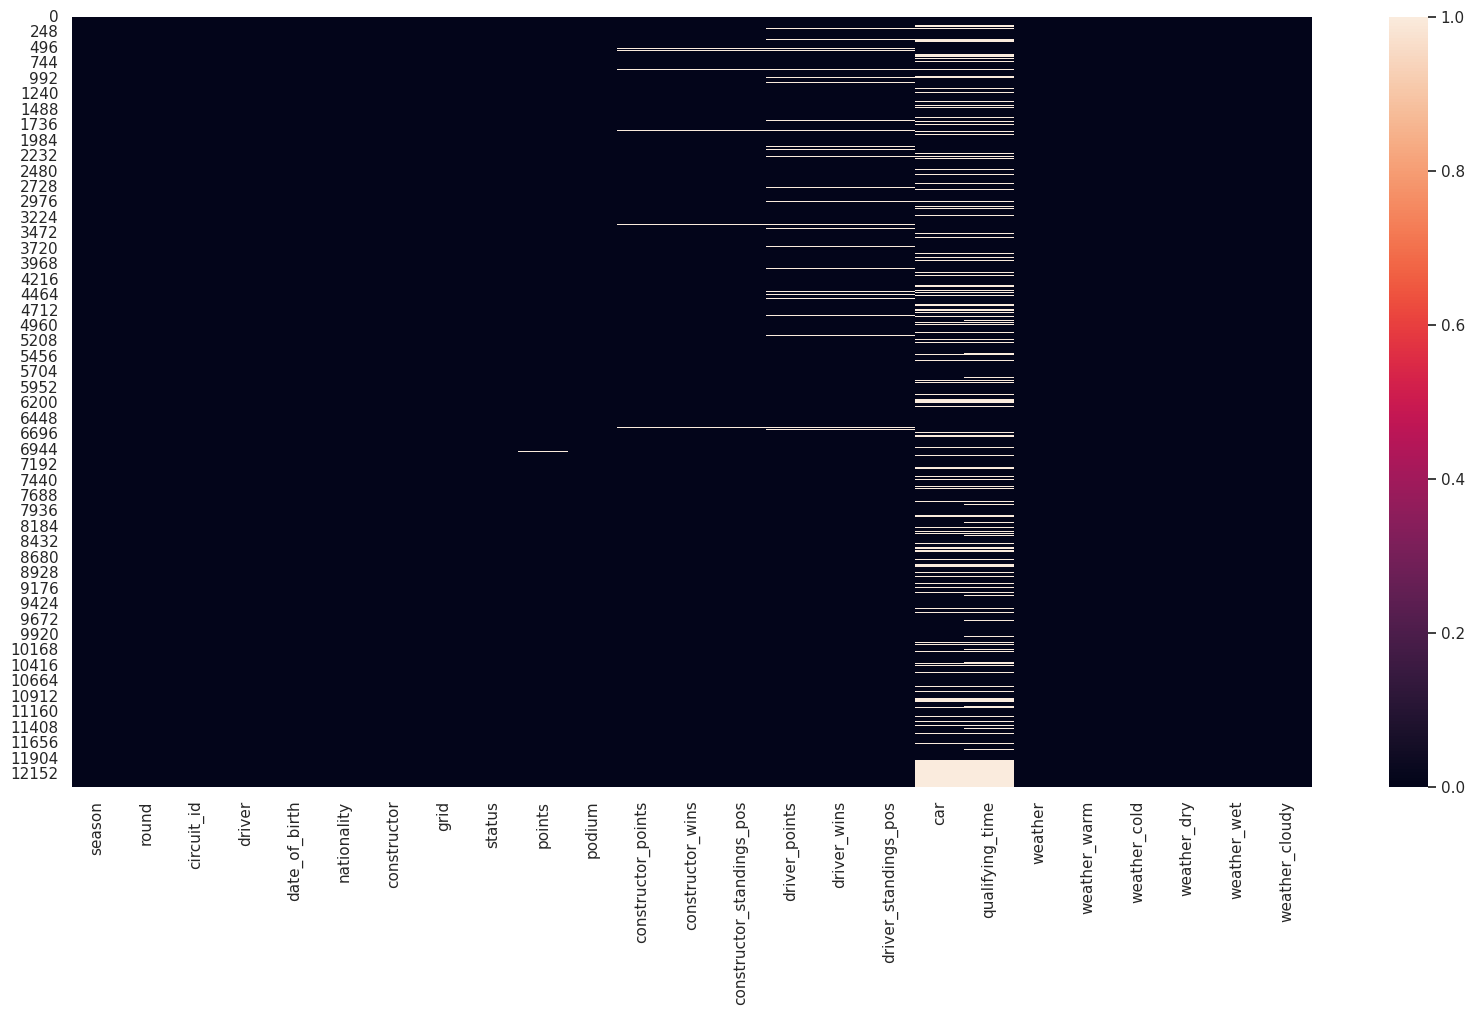

In [ ]:
# Visualisation rapide des valeurs manquantes par variable

df_merged_na=df_merged.isna().copy()
sns.heatmap(df_merged_na)


* We'll also have to manage a few missing values for 'qualifying_time', 'driver_wins', 'driver_points', driver_standings_pos in particular.

### Managing missing values

* We replace some missing values with 0s (see below for important categories), which is very simple to implement and plausible for these missing values.
* We then delete all lines still containing missing values.

In [ ]:
x_var= ['driver_points', 'driver_wins', 'driver_standings_pos', 'constructor_points',
            'constructor_wins' , 'constructor_standings_pos']
for var in x_var:
    df_merged[var].fillna(0, inplace = True)
    df_merged[var] = df_merged[var].map(lambda x: int(x))


In [ ]:
df_merged.dropna(inplace = True )

### Creating new variables

We're now going to create some variables which are not directly accessible in our data, but which will undoubtedly enable us to predict the winner of the race. We'll create the "age" variable, which corresponds to the age (to the nearest year) of the drivers, and the "qualifying_time" variable, which contains the cumulative difference between the qualifying times of the drivers on pole position.

In [ ]:
df_merged["date_of_birth"]=pd.to_datetime(df_merged["date_of_birth"])
df_merged["season"]=pd.to_datetime(df_merged["season"], format="%Y") # conversion - format date
df_merged["age"]=round(((df_merged["season"]-df_merged['date_of_birth']).dt.days)/365)


In [ ]:
df_merged['qualifying_time'] = df_merged.qualifying_time.map(lambda x: 0 if str(x) == '00.000' else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if len(str(x).split(':'))>1 else 0))
df_merged = df_merged[df_merged['qualifying_time'] != 0]
df_merged.sort_values(['season', 'round', 'grid'], inplace = True)
df_merged['qualifying_time_diff'] = df_merged.groupby(['season', 'round']).qualifying_time.diff()
df_merged['qualifying_time'] = df_merged.groupby(['season', 'round']).qualifying_time_diff.cumsum().fillna(0)
df_merged.drop('qualifying_time_diff', axis = 1, inplace = True)

<ipython-input-65-fffa49aab48a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.sort_values(['season', 'round', 'grid'], inplace = True)
<ipython-input-65-fffa49aab48a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['qualifying_time_diff'] = df_merged.groupby(['season', 'round']).qualifying_time.diff()
<ipython-input-65-fffa49aab48a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
df_merged['qualifying_time']

0        0.000
1        1.121
13       1.399
19       1.784
2        1.950
         ...  
11911    0.794
11912    1.360
11914    2.977
11913    2.774
11915    3.172
Name: qualifying_time, Length: 9606, dtype: float64

### Preparing our categorical variables for modeling

We have multiple categorical variables, such as manufacturer, nationality and circuit variables. These variables are a priori useful for predicting the winner of a grand prix. So, to be able to use them in our modeling, we need to represent them in the form of an indicator:

In [ ]:


df_ind = pd.get_dummies(df_merged, columns = ['circuit_id', 'nationality', 'constructor'] )

for col in df_ind.columns:
    if 'nationality' in col and df_ind[col].sum() < 100:
        df_ind.drop(columns=col,inplace=True)

    elif 'constructor' in col and df_ind[col].sum() < 100:
        df_ind.drop(columns=col,inplace=True)

    elif 'circuit_id' in col and df_ind[col].sum() < 100:
        df_ind.drop(columns=col,inplace=True)

In [ ]:
del df_ind['date_of_birth']
del df_ind['car']
del df_ind['weather']

In [ ]:
df_ind['season']=pd.to_datetime(df_ind['season'])
df_ind['season'] = df_ind['season'].dt.year

In [ ]:
final_merged=df_ind.copy()

In [ ]:
np.set_printoptions(precision=4)

## III-2. Classification

* With this project, we want to predict the winner of an F1 grand prix. We can then proceed by classification, considering that the winner is in category 1 and the loser in category 0.

* To evaluate the performance of our model, we decided to train our model on the years prior to 2020 and measure the performance of our model as the percentage of races "well" predicted in 2020. There are other approaches, but we chose the latter because it allows us to intuitively assess the relevance or otherwise of the model over a recent year.

In [ ]:
comparison_dict ={'model':[],
                  'params': [],
                  'score': []}

In [ ]:
df = final_merged.copy()

df["podium"] = df["podium"].map(lambda x: 1 if x == 1 else 0) #(losers vs winners)

train = df[df["season"]<2020]
X_train = train.drop(['driver', 'podium','points'], axis = 1)
y_train = train["podium"]

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

ValueError: ignored

* We implement a function that returns the performance of our model, i.e. the percentage of "good" races predicted for 2020.

In [ ]:
def score_classification(model):
    score = 0
    for circuit in df[df.season == 2020]['round'].unique():

        test = df[(df.season == 2020) & (df['round'] == circuit)]
        X_test = test.drop(columns=["driver","podium","points"])
        y_test = test['podium']

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict_proba(X_test), columns = ['proba_0', 'proba_1'])
        prediction_df['actual'] = y_test.reset_index(drop = True)
        prediction_df.sort_values('proba_1', ascending = False, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df['predicted'].map(lambda x: 1 if x == 0 else 0)

        score += precision_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.season == 2020]['round'].unique().max()
    return model_score

###  SVM Classifier

* We've chosen to use the SVM model for classification, as it's a very common way of solving classification problems.

* To find the model parameters that give the best score, we'll test different parameter combinations. This code is fairly (if not very) slow to run.


In [ ]:
params={'gamma': np.logspace(-4, -1, 20),
        'C': np.logspace(-2, 1, 20),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

for gamma in params['gamma']:
    for c in params['C']:
        for kernel in params['kernel']:
            model_params = (gamma, c, kernel)
            model = svm.SVC(probability = True, gamma = gamma, C = c, kernel = kernel )
            model.fit(X_train, y_train)

            model_score = score_classification(model)

            comparison_dict['model'].append('svm_classifier')
            comparison_dict['params'].append(model_params)
            comparison_dict['score'].append(model_score)

ValueError: ignored

## III-3. Regression

* We can also consider our problem as a regression problem. Indeed, race ranking can be seen as a continuous variable, so the winner will be the one with the lowest ranking prediction.

* In order to compare our classification with our regression, we use the same test data (2020) and the same model performance indicator.

In [ ]:
df = final_merged.copy()

train = df[df.season<2020]
X_train = train.drop(['driver', 'podium','points'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

ValueError: ignored

* We implement a function that returns the performance of our model, i.e. the percentage of "good" races predicted for 2020.

In [ ]:
def score_regression(model,xvar):
    score=0
    les_circuits=df[df['season']==2020]["round"].unique()
    for circuit in les_circuits:
        test=df[(df['season']==2020) & (df['round']==circuit)]
        X_test=test[xvar]
        y_test=test["podium"]

        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


        prediction_df = pd.DataFrame(model.predict(X_test), columns = ['results'])
        prediction_df['podium'] = y_test.reset_index(drop = True)
        prediction_df['actual'] = prediction_df['podium'].map(lambda x: 1 if x == 1 else 0)
        prediction_df.sort_values('results', ascending = True, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)

        score += precision_score(prediction_df['actual'],prediction_df['predicted'])

    model_score = score / df[df.season == 2020]['round'].unique().max()
    return model_score

### Linear regression

* For regression, we chose to use linear regression. This is a very standard model, easy to interpret and relatively quick to run.

* First, we'll regress on all the explanatory variables to store their scores in our comparison dictionary.

* In a second step, we'll regress on different combinations of variables to understand which types of variables best predict the race winner.

In [ ]:

model = LinearRegression(fit_intercept = 'True')
model.fit(X_train, y_train)
model_score=score_regression(model,train.columns.drop(["driver","podium",'points']))
comparison_dict['model'].append('regression_lineaire')
comparison_dict['params'].append('True')
comparison_dict['score'].append(model_score)

InvalidParameterError: ignored

* We now regress on different combinations of variable groups:
- weather for all weather data
- grid for all qualifying data
- circuit for all circuit-related data
- constructor for all constructor data


In [ ]:
xvar_total=df.columns.drop(["driver",'podium'])
xvar_series=pd.Series(xvar_total)

xvar_weather=list(xvar_series[xvar_series.str.contains("weather")])
xvar_nationality=list(xvar_series[xvar_series.str.contains("nationality")])
xvar_circuit=list(xvar_series[xvar_series.str.contains("circuit")])
xvar_constructor=list(xvar_series[xvar_series.str.contains("constructor")])
xvar_grid=list(["grid","constructor_standings_pos","driver_standings_pos","qualifying_time"])

xvar_comparison={'xvar':[],'score':[]}

xvar_combinaison=[xvar_weather+xvar_grid,xvar_grid+xvar_circuit,xvar_nationality+xvar_circuit,xvar_constructor+xvar_circuit,xvar_weather+xvar_grid+xvar_constructor]
xvar_comparison['type_var']=["weather+grid","grid+circuit",'nationality+circuit','constructor+circuit',"weather+grid+constructor"]

for xvar in xvar_combinaison:
    X_train_2 = train[xvar].copy()
    y_train_2 = train["podium"].copy()

    scaler = StandardScaler()
    X_train_2 = pd.DataFrame(scaler.fit_transform(X_train_2), columns = X_train_2.columns)

    model = LinearRegression(fit_intercept = 'True')
    model.fit(X_train_2, y_train_2)

    model_score=score_regression(model,xvar)


    xvar_comparison['xvar'].append(xvar)
    xvar_comparison['score'].append(model_score)

InvalidParameterError: ignored

In [ ]:
comparaison_xvar=pd.DataFrame(xvar_comparison)
comparaison_xvar=comparaison_xvar.groupby("type_var")["score"].max().reset_index()
print(comparaison_xvar)
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=comparaison_xvar, x='type_var', y='score', ax=ax1, palette=sns.color_palette("icefire"))

ValueError: ignored

* Comments: Some combinations of variables are better at predicting the final result. For example, the constructor+circuit combination scores 52%, while the nationality+circuit combination scores 5%.

# III-4. Comparison of our two models

* In this final modeling section, we'll compare our models by comparing the maximum scores obtained.

                 model     score
0  regression_lineaire  0.647059
1       svm_classifier  0.705882


<AxesSubplot:xlabel='model', ylabel='score'>

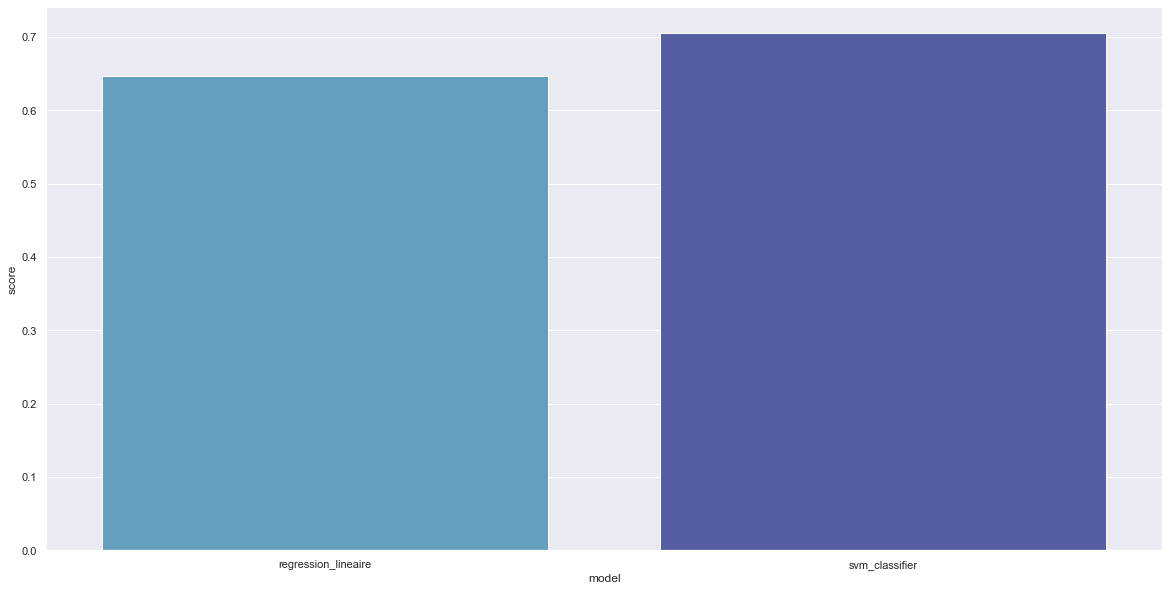

In [ ]:
comparaison_model=pd.DataFrame(comparison_dict)
comparaison_model=comparaison_model.groupby("model")["score"].max().reset_index()
print(comparaison_model)
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=comparaison_model, x='model', y='score', ax=ax1, palette=sns.color_palette("icefire"))

* We note that linear regression scores 65% versus 70% for the SVM classifier.
* However, we note that linear regression runs much faster than the SVM classifier.